In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
md = pd.read_csv('../dataset/movies_metadata_pred.csv')
md.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  adult                              belongs_to_collection  \
0           0  False  {'id': 10194, 'name': 'Toy Story Collection', ...   
1           1  False                                                NaN   
2           2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
3           3  False                                                NaN   
4           4  False  {'id': 96871, 'name': 'Father of the Bride Col...   

     budget                                             genres  \
0  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4         0                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title        ...             revenue runtime  \
0                    Toy Story        ...         373554033.0    81.0   
1                      Jumanji        ...         262797249.0   104.0   
2             Grumpier Old Men        ...                 0.0   101.0   
3            Waiting to Exhale        ...          81452156.0   127.0   
4  Father of the Bride Part II        ...          76578911.0   106.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average vote_count  \
0                    Toy Story  False           7.7     5415.0   
1                      Jumanji  False           6.9     2413.0   
2             Grumpier Old Men  False           6.5       92.0   
3            Waiting to Exhale  False           6.1       34.0   
4  Father of the Bride Part II  False           5.7      173.0   

  pred_vote_average  
0          9.015446  
1          5.048575  
2          5.889390  
3          2.914139  
4          8.668065  

[5 rows x 26 columns]

In [3]:
df = md[['original_title', 'vote_average', 'pred_vote_average']]
df.head()

original_title  vote_average  pred_vote_average
0                    Toy Story           7.7           9.015446
1                      Jumanji           6.9           5.048575
2             Grumpier Old Men           6.5           5.889390
3            Waiting to Exhale           6.1           2.914139
4  Father of the Bride Part II           5.7           8.668065

In [4]:
df.shape

(45466, 3)

In [5]:
dfListTitle = list(df['original_title'])
dfListVote_average = list(df['vote_average'])
dfListPred_vote_average = list(df['pred_vote_average'])

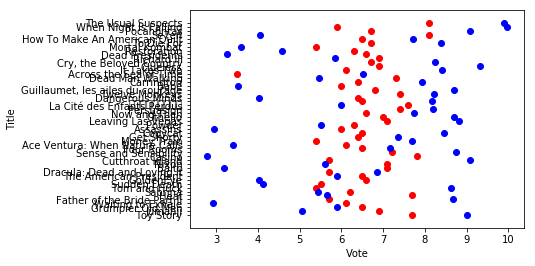

In [6]:
#to see the relationship between the training data values
amount_show = 50
plt.scatter(dfListVote_average[0:amount_show],dfListTitle[0:amount_show],c='red')
plt.scatter(dfListPred_vote_average[0:amount_show],dfListTitle[0:amount_show],c='blue')
plt.xlabel('Vote')
plt.ylabel('Title')
plt.show()

In [7]:
def mse(a, b):
    error = 0.0
    for i in range(len(a)):
        error += (b[i] - a[i]) ** 2
    return error / len(a)

def numpy_mse(a, b):
    mse = ((a - b)**2)
    sum_error = mse.sum()
    return sum_error / a.shape[0]

In [8]:
numpy_a = np.array(dfListVote_average, dtype=np.float32)
numpy_b = np.array(dfListPred_vote_average, dtype=np.float32)

numpy_a = np.nan_to_num(numpy_a)
numpy_b = np.nan_to_num(numpy_b)

list_a = numpy_a.tolist()
list_b = numpy_b.tolist()

tic = time.time()
print(mse(list_a, list_b))
toc = time.time()
print ("time passed for LIST: " + str(toc-tic) + "ms")

tic = time.time()
print(numpy_mse(numpy_a, numpy_b))
toc = time.time()
print ("time passed for NUMPY: " + str(toc-tic) + "ms")

8.837961798185457
time passed for LIST: 0.005336761474609375ms
8.837962021070691
time passed for NUMPY: 0.00025200843811035156ms


In [9]:
import numpy as np
import time
a = (np.random.rand(1,1000000)) #create a random (1,10) array
# a = (np.random.rand(1,1000000)) #create a random (1,10) array
result1 = np.zeros((1,1000000),dtype=np.int) #create an array of zeros to hold the result
#print ("a: \n" + str(a))
tic = time.time()
for i in range(1000000):
    if a[0,i]>0.5:
        result1[0,i] = 1
    else:
        result1[0,i] = 0
#print ("result: \n" +str(result))
toc = time.time()
print ("time passed for result1: " + str(toc-tic) + "ms")

tic = time.time()
result2 = (np.where(a>0.5,1,0)) 
#print ("result2: \n" +str(result2))
toc = time.time()
print ("time passed for result2: " + str(toc-tic) + "ms")

time passed for result1: 0.3241574764251709ms
time passed for result2: 0.00611567497253418ms
